In [1]:
%load_ext autoreload
%autoreload 2

import sys 
sys.path.append("../")

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt 
import numpy as np 

In [3]:
# CIFAR10 Dataset
from modules.utils import load_data
X_train, y_train = load_data(mode='train')
num_training = 49000
num_validation = 1000

X_val = X_train[-num_validation:, :]
y_val = y_train[-num_validation:]

X_train = X_train[:num_training, :]
y_train = y_train[:num_training]


X_train = X_train.reshape(-1,3,32,32).transpose(0,2,3,1) / 255
X_val = X_val.reshape(-1,3,32,32).transpose(0,2,3,1) / 255

print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)

./data/cifar-10-python.tar.gz already exists. Begin extracting...
Train data shape:  (49000, 32, 32, 3)
Train labels shape:  (49000,)
Validation data shape:  (1000, 32, 32, 3)
Validation labels shape:  (1000,)


In [4]:
dev_train = X_train[:10,:,:,:]
dev_train.shape

(10, 32, 32, 3)

In [5]:
from modules.spectral_pooling import SpectralPooling

In [6]:
spectral_pooling = SpectralPooling()

_,dev_output = spectral_pooling.utils_spectral_pool(dev_train,pool_size=2)

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x7ff52aa22c50>)

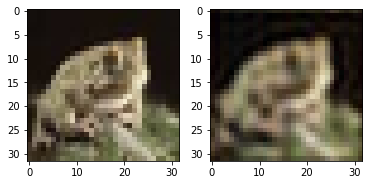

In [7]:
dev1 = dev_train[1,:,:,:]
dev2 = dev_output[1,:,:,:]
plt.subplot(121),plt.imshow(dev1, cmap='gray')
plt.subplot(122),plt.imshow(dev2, cmap='gray')

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x7ff4d870d470>)

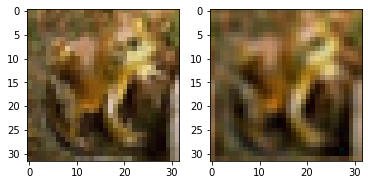

In [8]:
dev1 = dev_train[2,:,:,:]
dev2 = dev_output[2,:,:,:]
plt.subplot(121),plt.imshow(dev1, cmap='gray')
plt.subplot(122),plt.imshow(dev2, cmap='gray')

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x7ff4d86c59e8>)

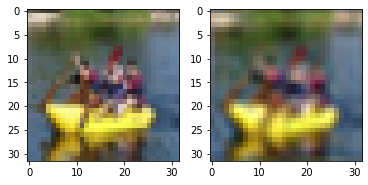

In [9]:
dev1 = dev_train[3,:,:,:]
dev2 = dev_output[3,:,:,:]
plt.subplot(121),plt.imshow(dev1, cmap='gray')
plt.subplot(122),plt.imshow(dev2, cmap='gray')

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x7ff4d8600c88>)

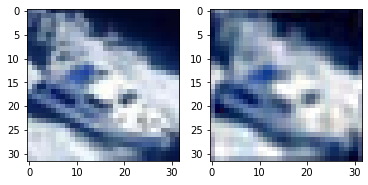

In [10]:
dev1 = dev_train[4,:,:,:]
dev2 = dev_output[4,:,:,:]
plt.subplot(121),plt.imshow(dev1, cmap='gray')
plt.subplot(122),plt.imshow(dev2, cmap='gray')

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x7ff4d85d9a90>)

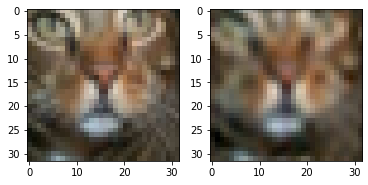

In [11]:
dev1 = dev_train[5,:,:,:]
dev2 = dev_output[5,:,:,:]
plt.subplot(121),plt.imshow(dev1, cmap='gray')
plt.subplot(122),plt.imshow(dev2, cmap='gray')

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x7ff4d8469160>)

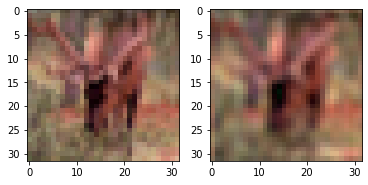

In [12]:
dev1 = dev_train[6,:,:,:]
dev2 = dev_output[6,:,:,:]
plt.subplot(121),plt.imshow(dev1, cmap='gray')
plt.subplot(122),plt.imshow(dev2, cmap='gray')

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x7ff4d83a52b0>)

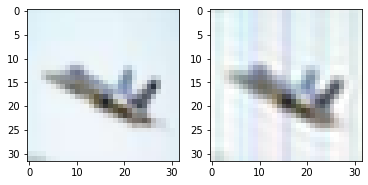

In [13]:
dev1 = dev_train[8,:,:,:]
dev2 = dev_output[8,:,:,:]
plt.subplot(121),plt.imshow(dev1, cmap='gray')
plt.subplot(122),plt.imshow(dev2, cmap='gray')

### CIFAR10  Validation Set

In [14]:
from tensorflow.keras.layers import MaxPool2D
from modules.utils import approximation_loss,max_pool

In [134]:
print(f"Using CIFAR-10 Validation Set for Approximation graph of shape : {X_val.shape}")

Using CIFAR-10 Validation Set for Approximation graph of shape : (1000, 32, 32, 3)


In [135]:
pool_size = [2, 4, 8, 16, 32]

max_pool_loss = []
spectral_pool_loss = []


for i in pool_size:
#     max_pool_2d = tf.keras.layers.MaxPooling2D(pool_size=i,padding="SAME")
#     max_pooledimage = max_pool_2d(X_val)
    max_pooledimage=max_pool(X_val,i)
    apx_loss = approximation_loss(X_val,max_pooledimage)
    max_pool_loss.append(apx_loss)
    
    print(f"Max Pool Computation Complete , Output Shape {max_pooledimage.shape} , apx loss {apx_loss}")

filter_size_sp =  list(np.arange(1,2,step=0.4)) + list(np.arange(2,16))

for s in filter_size_sp:
    spectral_pooling = SpectralPooling()
    _,dev_output = spectral_pooling.utils_spectral_pool(X_val,pool_size=s)

    apx_loss = approximation_loss(X_val,dev_output)
    spectral_pool_loss.append(apx_loss)
    print(f"Spectral Pool Computation Complete , Output Shape {dev_output.shape} , apx loss {apx_loss},pool_size {s}")

Max Pool Computation Complete , Output Shape (1000, 32, 32, 3) , apx loss 0.1919691313523507
Max Pool Computation Complete , Output Shape (1000, 32, 32, 3) , apx loss 0.3807541503290479
Max Pool Computation Complete , Output Shape (1000, 32, 32, 3) , apx loss 0.5813656311293451
Max Pool Computation Complete , Output Shape (1000, 32, 32, 3) , apx loss 0.7933630078886846
Max Pool Computation Complete , Output Shape (1000, 32, 32, 3) , apx loss 0.9388743145421019
Spectral Pool Computation Complete , Output Shape (1000, 32, 32, 3) , apx loss nan,pool_size 1.0
Distance From Corner 5
Spectral Pool Computation Complete , Output Shape (1000, 32, 32, 3) , apx loss 0.12123888096135131,pool_size 1.4
Distance From Corner 8
Spectral Pool Computation Complete , Output Shape (1000, 32, 32, 3) , apx loss 0.13583164700424638,pool_size 1.7999999999999998
Distance From Corner 8
Spectral Pool Computation Complete , Output Shape (1000, 32, 32, 3) , apx loss 0.13583164700424638,pool_size 2
Distance From Cor

In [136]:
pool_frac_kept = [1/x**2 for x in pool_size]
sp_frac_kept = [1/x**2 for x in filter_size_sp]

Text(0, 0.5, 'Relative Loss')

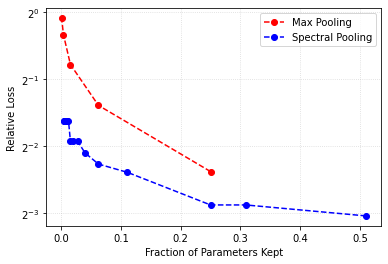

In [137]:
fig, ax = plt.subplots(1, 1)

ax.semilogy(pool_frac_kept, max_pool_loss, base=2,
            marker='o', linestyle='--', color='r', label='Max Pooling')


ax.semilogy(sp_frac_kept, spectral_pool_loss, base=2,
            marker='o', linestyle='--', color='b', label='Spectral Pooling')

ax.legend()
ax.grid(linestyle=':', alpha=0.5)

ax.set_xlabel('Fraction of Parameters Kept')
ax.set_ylabel('Relative Loss')